# La propagation de l'épidimie Covid 19

Dans notre sujet de modélisation de propagation d’une épidémie , On a voulu adapter un modèle de propagation géneral  à un environnement universitaire , avec  un model très proche de la réalité .On a divisé Cette étude à trois cas  différents :interaction sociale normale ,avec  distanciation sociale , avec quarantaine, pour pouvoir visualiser la différence entre les trois cas et conclure que le confinement plus il est stricte plus le nombre de cas redescend drastiquement pour convaincre le sceptiques de la distanciation sociale avec données concrètes  dans le cas d’université de Lille

### Avec Interaction normale :

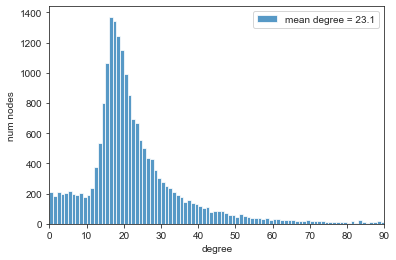

TypeError: __init__() got an unexpected keyword argument 'Q'

In [19]:
from models import *
from networks import *
import networkx
from models import *


numNodes = 20000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=20)
# Baseline normal interactions:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
plot_degree_distn(G_normal, max_degree=90)
# Social distancing interactions:

G_distancing = custom_exponential_graph(baseGraph, scale=10)
#plot_degree_distn(G_distancing, max_degree=40)
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)

#plot_degree_distn(G_quarantine, max_degree=40)

model = SEIRSNetworkModel(G       =G_normal, 
                          beta    =0.155, 
                          sigma   =1/5.2, 
                          gamma   =1/12.39, 
                          mu_I    =0.0004,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          p       =0.5,
                          Q       =G_quarantine, 
                          beta_D  =0.155, 
                          sigma_D =1/5.2, 
                          gamma_D =1/12.39, 
                          mu_D    =0.0004,
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, 
                          phi_I   =0, 
                          psi_E   =1.0, 
                          psi_I   =1.0,
                          q       =0.5,
                          initI   =numNodes/100, 
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)


checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, G_normal], 
               'p':       [0.1, 0.5], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}


    

model.run(T=300, checkpoints=checkpoints)
model.figure_infections(vlines=checkpoints['t'], ylim=0.15)
ref_model = SEIRSNetworkModel(G=G_normal, beta=0.155, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0, theta_I=0, phi_E=0, phi_I=0, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=numNodes/100)
ref_model.run(T=300)
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, shaded_reference_results=ref_model)
ref_model_determ = SEIRSModel(beta=0.147, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, initI=100, initN=10000) 
ref_model_determ.run(T=300)
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, 
                        shaded_reference_results=ref_model, shaded_reference_label='network: no interventions',
                        dashed_reference_results=ref_model_determ, dashed_reference_label='deterministic: no interventions')

### Avec distanciation sociale :

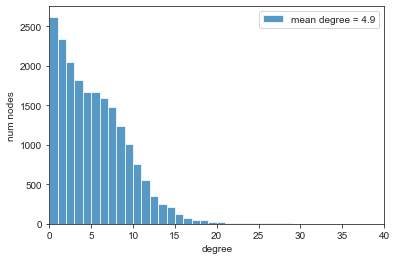

TypeError: __init__() got an unexpected keyword argument 'Q'

In [16]:
from models import *
from networks import *
import networkx
from models import *


numNodes = 20000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=20)
# Baseline normal interactions:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
#plot_degree_distn(G_normal, max_degree=90)
# Social distancing interactions:

G_distancing = custom_exponential_graph(baseGraph, scale=10)
plot_degree_distn(G_distancing, max_degree=40)
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)

#plot_degree_distn(G_quarantine, max_degree=40)

model = SEIRSNetworkModel(G       =G_normal, 
                          beta    =0.155, 
                          sigma   =1/5.2, 
                          gamma   =1/12.39, 
                          mu_I    =0.0004,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          p       =0.5,
                          Q       =G_quarantine, 
                          beta_D  =0.155, 
                          sigma_D =1/5.2, 
                          gamma_D =1/12.39, 
                          mu_D    =0.0004,
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, 
                          phi_I   =0, 
                          psi_E   =1.0, 
                          psi_I   =1.0,
                          q       =0.5,
                          initI   =numNodes/100, 
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)


checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, G_normal], 
               'p':       [0.1, 0.5], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}


    

model.run(T=300, checkpoints=checkpoints)
model.figure_infections(vlines=checkpoints['t'], ylim=0.15)
ref_model = SEIRSNetworkModel(G=G_normal, beta=0.155, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0, theta_I=0, phi_E=0, phi_I=0, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=numNodes/100)
ref_model.run(T=300)
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, shaded_reference_results=ref_model)
ref_model_determ = SEIRSModel(beta=0.147, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, initI=100, initN=10000) 
ref_model_determ.run(T=300)
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, 
                        shaded_reference_results=ref_model, shaded_reference_label='network: no interventions',
                        dashed_reference_results=ref_model_determ, dashed_reference_label='deterministic: no interventions')

### Avec  quarantaine :


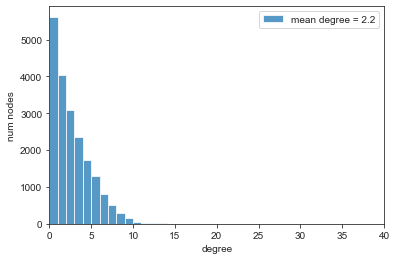

TypeError: __init__() got an unexpected keyword argument 'Q'

In [8]:
from models import *
from networks import *
import networkx
from models import *


numNodes = 20000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=20)
# Baseline normal interactions:
G_normal     = custom_exponential_graph(baseGraph, scale=100)
#plot_degree_distn(G_normal, max_degree=90)
# Social distancing interactions:

G_distancing = custom_exponential_graph(baseGraph, scale=10)
#plot_degree_distn(G_distancing, max_degree=40)
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)

plot_degree_distn(G_quarantine, max_degree=40)

model = SEIRSNetworkModel(G       =G_normal, 
                          beta    =0.155, 
                          sigma   =1/5.2, 
                          gamma   =1/12.39, 
                          mu_I    =0.0004,
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          p       =0.5,
                          Q       =G_quarantine, 
                          beta_D  =0.155, 
                          sigma_D =1/5.2, 
                          gamma_D =1/12.39, 
                          mu_D    =0.0004,
                          theta_E =0, 
                          theta_I =0, 
                          phi_E   =0, 
                          phi_I   =0, 
                          psi_E   =1.0, 
                          psi_I   =1.0,
                          q       =0.5,
                          initI   =numNodes/100, 
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)


checkpoints = {'t':       [20, 100], 
               'G':       [G_distancing, G_normal], 
               'p':       [0.1, 0.5], 
               'theta_E': [0.02, 0.02], 
               'theta_I': [0.02, 0.02], 
               'phi_E':   [0.2, 0.2], 
               'phi_I':   [0.2, 0.2]}


    

model.run(T=300, checkpoints=checkpoints)
model.figure_infections(vlines=checkpoints['t'], ylim=0.15)
ref_model = SEIRSNetworkModel(G=G_normal, beta=0.155, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, p=0.5,
                          Q=G_quarantine, beta_D=0.155, sigma_D=1/5.2, gamma_D=1/12.39, mu_D=0.0004,
                          theta_E=0, theta_I=0, phi_E=0, phi_I=0, psi_E=1.0, psi_I=1.0, q=0.5,
                          initI=numNodes/100)
ref_model.run(T=300)
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, shaded_reference_results=ref_model)
ref_model_determ = SEIRSModel(beta=0.147, sigma=1/5.2, gamma=1/12.39, mu_I=0.0004, initI=100, initN=10000) 
ref_model_determ.run(T=300)
model.figure_infections(vlines=checkpoints['t'], ylim=0.2, 
                        shaded_reference_results=ref_model, shaded_reference_label='network: no interventions',
                        dashed_reference_results=ref_model_determ, dashed_reference_label='deterministic: no interventions')

#### Dans cette deuxième partie, on va étudier la propagation de l'épidimie dans trois périodes :latente et symptomatic et dans la période d'hospitalisation en utilisant la théorie des graphes, dont les personnes sont representées par des noeuds et nous on controle leur interaction 

### Période latente

latent period:  mean = 2.29, std = 1.13, 95% CI = (0.63, 5.03)

pre-symptomatic period:  mean = 2.89, std = 1.40, 95% CI = (0.75, 5.91)

total incubation period:  mean = 5.18, std = 1.74, 95% CI = (2.50, 8.71)



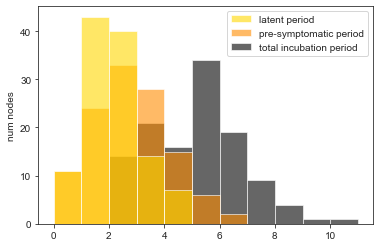

In [9]:


from seirsplus.models import *
from seirsplus.networks import *
from seirsplus.sim_loops import *
from seirsplus.utilities import *
import networkx
import matplotlib.pyplot as pyplot

from models import *
from networks import *
from sim_loops import *
from utilities import *


NUM_COHORTS              = 4
NUM_NODES_PER_COHORT     = 30
NUM_TEAMS_PER_COHORT     = 2

MEAN_INTRACOHORT_DEGREE  = 3
PCT_CONTACTS_INTERCOHORT = 0.1

N = NUM_NODES_PER_COHORT*NUM_COHORTS
INIT_EXPOSED =2

"""
G_baseline, cohorts, teams = generate_workplace_contact_network(
                                 num_cohorts=NUM_COHORTS, num_nodes_per_cohort=NUM_NODES_PER_COHORT, 
                                 num_teams_per_cohort=NUM_TEAMS_PER_COHORT,
                                 mean_intracohort_degree=MEAN_INTRACOHORT_DEGREE, 
                                 pct_contacts_intercohort=PCT_CONTACTS_INTERCOHORT,
                                 farz_params=({'alpha':5.0, 'gamma':5.0, 'beta':0.5, 'r':1, 'q':0.0, 'phi':10, 
                                              'b':0, 'epsilon':1e-6, 'directed': False, 'weighted': False})
                                 network_info(G_baseline, "Baseline" , plot=True)
"""



#1 latent period
latentPeriod_mean, latentPeriod_coeffvar = 3.0, 0.6
SIGMA   = 1 / gamma_dist(latentPeriod_mean, latentPeriod_coeffvar, N)

presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar = 2.2, 0.5
LAMDA   = 1 / gamma_dist(presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar, N)

dist_info([1/LAMDA, 1/SIGMA, 1/LAMDA+1/SIGMA], ["latent period", "pre-symptomatic period", "total incubation period"], plot=True, colors=['gold', 'darkorange', 'black'], reverse_plot=True)






### Période symptomatic

pre-symptomatic period:  mean = 2.29, std = 1.13, 95% CI = (0.63, 5.03)

(a)symptomatic period:  mean = 2.85, std = 1.17, 95% CI = (0.98, 5.68)

total infectious period:  mean = 5.15, std = 1.65, 95% CI = (2.58, 8.32)



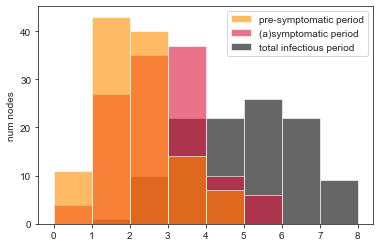

In [10]:
from seirsplus.models import *
from seirsplus.networks import *
from seirsplus.sim_loops import *
from seirsplus.utilities import *
import networkx
import matplotlib.pyplot as pyplot

from models import *
from networks import *
from sim_loops import *
from utilities import *


NUM_COHORTS              = 4
NUM_NODES_PER_COHORT     = 30
NUM_TEAMS_PER_COHORT     = 2

MEAN_INTRACOHORT_DEGREE  = 3
PCT_CONTACTS_INTERCOHORT = 0.1

N = NUM_NODES_PER_COHORT*NUM_COHORTS
INIT_EXPOSED =2

"""
G_baseline, cohorts, teams = generate_workplace_contact_network(
                                 num_cohorts=NUM_COHORTS, num_nodes_per_cohort=NUM_NODES_PER_COHORT, 
                                 num_teams_per_cohort=NUM_TEAMS_PER_COHORT,
                                 mean_intracohort_degree=MEAN_INTRACOHORT_DEGREE, 
                                 pct_contacts_intercohort=PCT_CONTACTS_INTERCOHORT,
                                 farz_params=({'alpha':5.0, 'gamma':5.0, 'beta':0.5, 'r':1, 'q':0.0, 'phi':10, 
                                              'b':0, 'epsilon':1e-6, 'directed': False, 'weighted': False})
                                 network_info(G_baseline, "Baseline" , plot=True)
"""


""""
#1 latent period
latentPeriod_mean, latentPeriod_coeffvar = 3.0, 0.6
SIGMA   = 1 / gamma_dist(latentPeriod_mean, latentPeriod_coeffvar, N)

presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar = 2.2, 0.5
LAMDA   = 1 / gamma_dist(presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar, N)

dist_info([1/LAMDA, 1/SIGMA, 1/LAMDA+1/SIGMA], ["latent period", "pre-symptomatic period", "total incubation period"], plot=True, colors=['gold', 'darkorange', 'black'], reverse_plot=True)


"""


#2 symptomatic period


symptomaticPeriod_mean, symptomaticPeriod_coeffvar = 3.0, 0.4
GAMMA   = 1 / gamma_dist(symptomaticPeriod_mean, symptomaticPeriod_coeffvar, N)

infectiousPeriod = 1/LAMDA + 1/GAMMA

dist_info([1/LAMDA, 1/GAMMA, 1/LAMDA+1/GAMMA], ["pre-symptomatic period", "(a)symptomatic period", "total infectious period"], plot=True, colors=['darkorange', 'crimson', 'black'], reverse_plot=True)

### Période d'hospitalisation

onset-to-hospitalization period:  mean = 11.40, std = 5.27, 95% CI = (4.15, 24.43)

hospitalization-to-discharge period:  mean = 10.61, std = 4.77, 95% CI = (2.68, 21.26)

onset-to-discharge period:  mean = 22.01, std = 7.25, 95% CI = (10.68, 38.30)



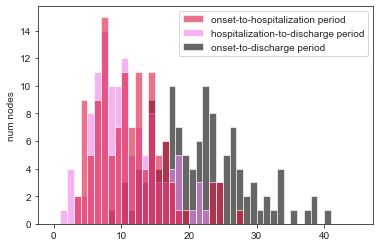

In [12]:
from seirsplus.models import *
from seirsplus.networks import *
from seirsplus.sim_loops import *
from seirsplus.utilities import *
import networkx
import matplotlib.pyplot as pyplot

from models import *
from networks import *
from sim_loops import *
from utilities import *


NUM_COHORTS              = 4
NUM_NODES_PER_COHORT     = 30
NUM_TEAMS_PER_COHORT     = 2

MEAN_INTRACOHORT_DEGREE  = 3
PCT_CONTACTS_INTERCOHORT = 0.1

N = NUM_NODES_PER_COHORT*NUM_COHORTS
INIT_EXPOSED =2

"""
G_baseline, cohorts, teams = generate_workplace_contact_network(
                                 num_cohorts=NUM_COHORTS, num_nodes_per_cohort=NUM_NODES_PER_COHORT, 
                                 num_teams_per_cohort=NUM_TEAMS_PER_COHORT,
                                 mean_intracohort_degree=MEAN_INTRACOHORT_DEGREE, 
                                 pct_contacts_intercohort=PCT_CONTACTS_INTERCOHORT,
                                 farz_params=({'alpha':5.0, 'gamma':5.0, 'beta':0.5, 'r':1, 'q':0.0, 'phi':10, 
                                              'b':0, 'epsilon':1e-6, 'directed': False, 'weighted': False})
                                 network_info(G_baseline, "Baseline" , plot=True)
"""


"""
#1 latent period
latentPeriod_mean, latentPeriod_coeffvar = 3.0, 0.6
SIGMA   = 1 / gamma_dist(latentPeriod_mean, latentPeriod_coeffvar, N)

presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar = 2.2, 0.5
LAMDA   = 1 / gamma_dist(presymptomaticPeriod_mean, presymptomaticPeriod_coeffvar, N)

dist_info([1/LAMDA, 1/SIGMA, 1/LAMDA+1/SIGMA], ["latent period", "pre-symptomatic period", "total incubation period"], plot=True, colors=['gold', 'darkorange', 'black'], reverse_plot=True)





#2 symptomatic period


symptomaticPeriod_mean, symptomaticPeriod_coeffvar = 3.0, 0.4
GAMMA   = 1 / gamma_dist(symptomaticPeriod_mean, symptomaticPeriod_coeffvar, N)

infectiousPeriod = 1/LAMDA + 1/GAMMA

dist_info([1/LAMDA, 1/GAMMA, 1/LAMDA+1/GAMMA], ["pre-symptomatic period", "(a)symptomatic period", "total infectious period"], plot=True, colors=['darkorange', 'crimson', 'black'], reverse_plot=True)

"""

#3 hospitalisation period


onsetToHospitalizationPeriod_mean, onsetToHospitalizationPeriod_coeffvar = 11.0, 0.45
ETA     = 1 / gamma_dist(onsetToHospitalizationPeriod_mean, onsetToHospitalizationPeriod_coeffvar, N)

hospitalizationToDischargePeriod_mean, hospitalizationToDischargePeriod_coeffvar = 11.0, 0.45
GAMMA_H = 1 / gamma_dist(hospitalizationToDischargePeriod_mean, hospitalizationToDischargePeriod_coeffvar, N)

dist_info([1/ETA, 1/GAMMA_H, 1/ETA+1/GAMMA_H], ["onset-to-hospitalization period", "hospitalization-to-discharge period", "onset-to-discharge period"], plot=True, colors=['crimson', 'violet', 'black'], reverse_plot=True)